In [6]:
from sklearn.preprocessing import MinMaxScaler

# 1. Ver columnas numéricas solamente
X_raw = df.select_dtypes(include=['number']).drop(columns=['song_popularity'])

# 2. Escalar
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)

# 3. Variable objetivo
y = df['song_popularity']
X = X_scaled


Mean Absolute Error (MAE): 15.16
Root Mean Squared Error (RMSE): 19.24
R² Score: 0.232


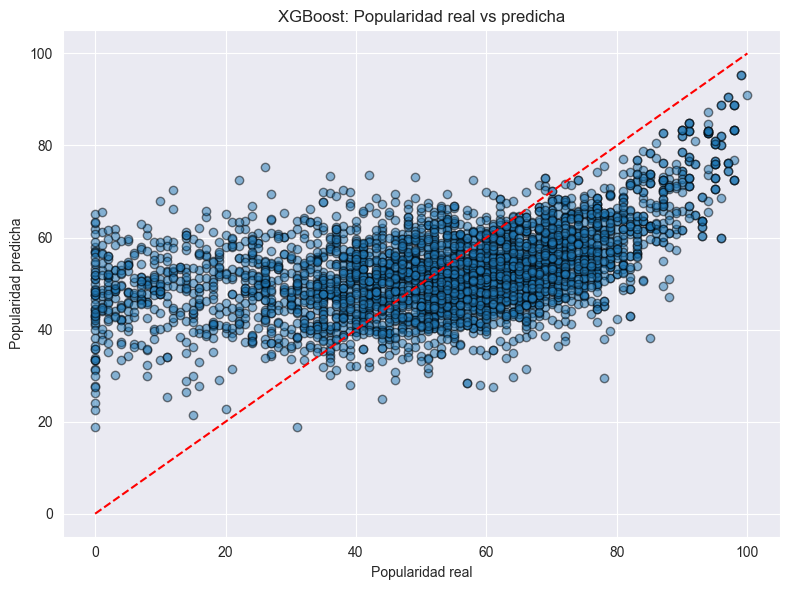

In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Variables predictoras escaladas (debes asegurarte de tener este DataFrame listo)
# Por ejemplo: X_scaled = scaler.fit_transform(df[feature_columns])
# Supongo que ya tienes eso hecho
df = pd.read_csv('song_data.csv')
# Variable objetivo
y = df['song_popularity']
X = X_scaled  # Asegúrate que esto ya esté definido y tiene las mismas filas que 'y'

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',  # importante para evitar warnings
    random_state=42
)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# Graficar resultados reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Popularidad real")
plt.ylabel("Popularidad predicha")
plt.title("XGBoost: Popularidad real vs predicha")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr[['song_popularity']].sort_values(by='song_popularity', ascending=False), annot=True)


ValueError: could not convert string to float: 'Boulevard of Broken Dreams'

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Mejor modelo:", grid.best_params_)


Mejor modelo: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
